In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-starbucks-survey-with-new-column-names/Starbucks satisfactory survey.csv


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
import geopandas as gpd
import plotly.express as px
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
%matplotlib inline
from sklearn.model_selection import train_test_split                
from sklearn.tree import DecisionTreeClassifier                     
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import classification_report                   
from sklearn import tree   
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

> **I. Exploratory Data Analysis**
1. Understanding the data in Statistical manner
2. Using data vizualization techniques to get clear understanding

In [3]:
df = pd.read_csv('../input/the-starbucks-survey-with-new-column-names/Starbucks satisfactory survey.csv')
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (122, 21)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Timestamp                 122 non-null    object
 1   Gender                    122 non-null    object
 2   Age                       122 non-null    object
 3   Profession                122 non-null    object
 4   Annual_Income             122 non-null    object
 5   Visting_Status            122 non-null    object
 6   Enjoyment_Rate            121 non-null    object
 7   Time_Spent_Per_visit      122 non-null    object
 8   Nearest_Outlet            122 non-null    object
 9   Membership_Status         122 non-null    object
 10  Most_Purchased_Product    122 non-null    object
 11  Spends_Per_Visit          122 non-null    object
 12  Quality_Rate              122 non-null    int64 
 13  Price_Rate                122 non-null    int64 
 14  Importance_Of_Promotions  

In [5]:
df.isnull().sum()

Timestamp                   0
Gender                      0
Age                         0
Profession                  0
Annual_Income               0
Visting_Status              0
Enjoyment_Rate              1
Time_Spent_Per_visit        0
Nearest_Outlet              0
Membership_Status           0
Most_Purchased_Product      0
Spends_Per_Visit            0
Quality_Rate                0
Price_Rate                  0
Importance_Of_Promotions    0
Ambaince_Rate               0
WiFi_Quality_Rate           0
Service_Rate                0
Preference_Rate             0
Sources                     1
Willingness                 0
dtype: int64

In [6]:
n = df.nunique(axis=0)
print(n)

Timestamp                   122
Gender                        2
Age                           4
Profession                    4
Annual_Income                 5
Visting_Status                5
Enjoyment_Rate                8
Time_Spent_Per_visit          5
Nearest_Outlet                3
Membership_Status             2
Most_Purchased_Product       20
Spends_Per_Visit              4
Quality_Rate                  5
Price_Rate                    5
Importance_Of_Promotions      5
Ambaince_Rate                 5
WiFi_Quality_Rate             5
Service_Rate                  5
Preference_Rate               5
Sources                      31
Willingness                   2
dtype: int64


In [7]:
gender_df = df.Gender.value_counts().reset_index()
gender_df.columns = ['Gender', 'count']
fig = px.pie(gender_df, values='count', names='Gender', title='Gender',
             color_discrete_sequence=['blue', 'light green'])
fig.show()

age_df = df.Age.value_counts().reset_index()
age_df.columns = ['Age', 'count']
fig = px.pie(age_df, values='count', names='Age', title='Age groups',
             color_discrete_sequence=['red', 'light blue'])
fig.show()

income_df = df.Annual_Income.value_counts().reset_index()
income_df.columns = ['Annual_Income', 'count']
fig = px.pie(income_df, values='count', names='Annual_Income', title='Annual Income',
             color_discrete_sequence=['blue', 'light green'])
fig.show()

profession_df = df.Profession.value_counts().reset_index()
profession_df.columns = ['Profession', 'count']
fig = px.pie(profession_df, values='count', names='Profession', title='Profession',
             color_discrete_sequence=['red', 'light blue'])
fig.show()




In [8]:
df["Enjoyment_Rate"].replace({"Never": "None", "never": "None", "NA": "None", "I dont like coffee":"None", "Never buy": "None", "Never ":"None"}, inplace=True)
df['Visting_Status'].fillna('Never', inplace = True)
df['Enjoyment_Rate'].fillna('None', inplace = True)
n = df.nunique(axis=0)
print(n)

Timestamp                   122
Gender                        2
Age                           4
Profession                    4
Annual_Income                 5
Visting_Status                5
Enjoyment_Rate                4
Time_Spent_Per_visit          5
Nearest_Outlet                3
Membership_Status             2
Most_Purchased_Product       20
Spends_Per_Visit              4
Quality_Rate                  5
Price_Rate                    5
Importance_Of_Promotions      5
Ambaince_Rate                 5
WiFi_Quality_Rate             5
Service_Rate                  5
Preference_Rate               5
Sources                      31
Willingness                   2
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder

df1 = df.copy(deep = True)
le_gen = LabelEncoder()
df1['Gender'] = le_gen.fit_transform(df['Gender'])

le_age = LabelEncoder()
df1['Age'] = le_age.fit_transform(df['Age'])

le_prof = LabelEncoder()
df1['Profession'] = le_prof.fit_transform(df['Profession'])

le_inc = LabelEncoder()
df1['Annual_Income'] = le_inc.fit_transform(df['Annual_Income'])

le_vis = LabelEncoder()
df1['Visting_Status'] = le_vis.fit_transform(df['Visting_Status'])

le_time = LabelEncoder()
df1['Time_Spent_Per_visit'] = le_time.fit_transform(df['Time_Spent_Per_visit'])

le_out = LabelEncoder()
df1['Nearest_Outlet'] = le_out.fit_transform(df['Nearest_Outlet'])

le_memb = LabelEncoder()
df1['Membership_Status'] = le_memb.fit_transform(df['Membership_Status'])

le_sp = LabelEncoder()
df1['Spends_Per_Visit'] = le_sp.fit_transform(df['Spends_Per_Visit'])

le_will = LabelEncoder()
df1['Willingness'] = le_will.fit_transform(df['Willingness'])

df1

,Timestamp,Gender,Age,Profession,Annual_Income,Visting_Status,Enjoyment_Rate,Time_Spent_Per_visit,Nearest_Outlet,Membership_Status,...,Spends_Per_Visit,Quality_Rate,Price_Rate,Importance_Of_Promotions,Ambaince_Rate,WiFi_Quality_Rate,Service_Rate,Preference_Rate,Sources,Willingness
0,2019/10/01 12:38:43 PM GMT+8,0,2,3,0,3,Dine in,3,2,1,...,1,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,1
1,2019/10/01 12:38:54 PM GMT+8,0,2,3,0,3,Take away,0,0,1,...,1,4,3,4,4,4,5,2,Social Media;In Store displays,1
2,2019/10/01 12:38:56 PM GMT+8,1,2,0,0,1,Dine in,3,1,1,...,1,4,3,4,4,4,4,3,In Store displays;Billboards,1
3,2019/10/01 12:39:08 PM GMT+8,0,2,3,0,3,Take away,0,1,0,...,1,2,1,4,3,3,3,3,Through friends and word of mouth,0
4,2019/10/01 12:39:20 PM GMT+8,1,2,3,0,1,Take away,3,0,0,...,0,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,1,0,2,3,1,Dine in,1,0,1,...,0,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,1
118,2019/10/04 9:30:09 AM GMT+8,1,2,0,0,1,Dine in,1,0,1,...,2,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,1
119,2019/10/04 1:46:07 PM GMT+8,1,2,3,0,3,Dine in,3,0,0,...,1,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,0
120,2019/10/05 11:01:14 AM GMT+8,0,2,0,0,3,Take away,0,2,0,...,1,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,1


In [10]:
fig = px.histogram(df, x="Enjoyment_Rate")
fig.update_layout(barmode='stack')
fig.show()

fig = px.histogram(df, x="Visting_Status")
fig.update_layout(barmode='stack')
fig.show()

In [11]:
check = pd.DataFrame(zip(df1.Membership_Status, df1.Willingness))
print(check)

     0  1
0    1  1
1    1  1
2    1  1
3    0  0
4    0  1
..  .. ..
117  1  1
118  1  1
119  0  0
120  0  1
121  0  0

[122 rows x 2 columns]


II. Data Modelling
1. Deciding the best source of advertising

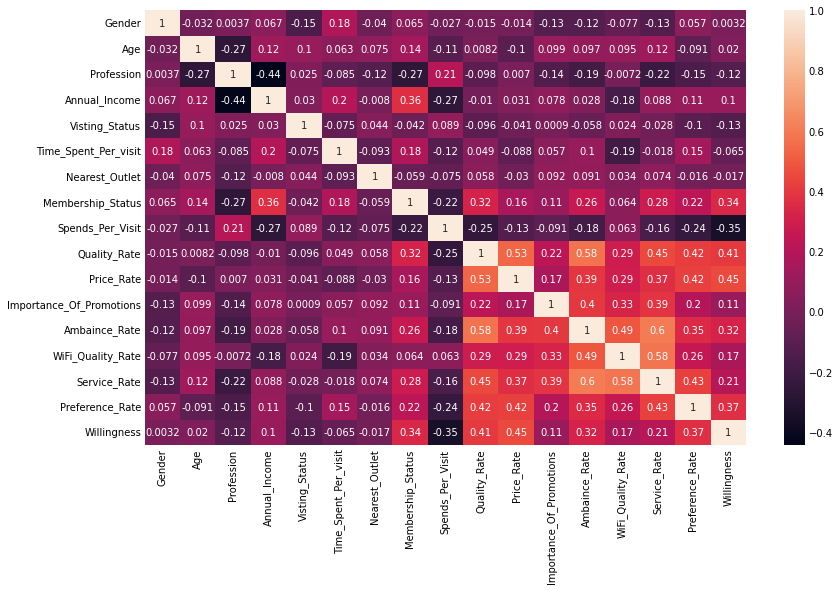

In [12]:
corr1 = df1.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr1,annot=True)
plt.show()

In [13]:
#Dependent variables
X = np.array(df1[['Quality_Rate', 'Ambaince_Rate', 'Service_Rate', 'Preference_Rate', 'Price_Rate', 'Membership_Status']]) 

#Independent variables
y = np.array(df1["Willingness"])  

In [14]:
X

array([[4, 5, 4, 3, 3, 1],
       [4, 4, 5, 2, 3, 1],
       [4, 4, 4, 3, 3, 1],
       [2, 3, 3, 3, 1, 0],
       [3, 2, 3, 3, 3, 0],
       [4, 5, 5, 4, 3, 0],
       [5, 5, 5, 5, 5, 1],
       [4, 3, 3, 3, 2, 1],
       [5, 4, 4, 4, 4, 1],
       [4, 4, 3, 4, 3, 0],
       [4, 5, 3, 4, 1, 0],
       [3, 4, 4, 4, 2, 0],
       [4, 4, 3, 4, 3, 1],
       [4, 4, 4, 3, 3, 1],
       [5, 5, 5, 2, 2, 1],
       [4, 4, 4, 4, 1, 1],
       [4, 4, 3, 3, 3, 1],
       [4, 4, 4, 4, 4, 1],
       [4, 5, 5, 5, 3, 1],
       [3, 4, 4, 2, 4, 1],
       [2, 3, 4, 3, 2, 1],
       [5, 3, 4, 5, 3, 0],
       [5, 5, 4, 3, 2, 0],
       [5, 5, 4, 3, 4, 1],
       [4, 4, 3, 5, 3, 0],
       [4, 4, 5, 4, 3, 1],
       [4, 4, 4, 2, 2, 0],
       [5, 4, 4, 3, 3, 0],
       [4, 3, 4, 5, 5, 1],
       [5, 5, 5, 5, 5, 1],
       [3, 4, 4, 4, 1, 1],
       [4, 3, 3, 4, 3, 1],
       [2, 5, 5, 5, 3, 0],
       [3, 3, 4, 3, 2, 1],
       [3, 3, 4, 3, 4, 0],
       [4, 4, 4, 1, 2, 0],
       [3, 4, 5, 2, 3, 0],
 

In [15]:
y

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state = 100)  

In [17]:
#Linear Regression
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)
y_1 = reg.predict(X_test)

In [18]:
y_1

array([0.59778004, 0.85138355, 1.2165104 , 0.36081319, 0.79672923,
       1.02527398, 0.83638034, 1.08784209, 0.66926667, 0.69582738,
       0.63003446, 0.78881543, 1.2692607 , 0.76295299, 0.59574991,
       0.72271524, 0.58043943, 0.92539754, 0.86669404, 0.84522931,
       0.68710452, 1.2165104 , 1.05406586, 0.82259167, 0.90047028,
       0.65558963, 0.95765196, 0.80728119, 0.97082069, 0.74428621,
       0.53147881, 1.0138281 , 0.63598767, 0.82259167, 0.71113787,
       0.75224126, 1.09745887, 1.2165104 , 0.95125998, 0.6941244 ,
       0.89255648, 1.2165104 , 0.46911173, 1.2165104 , 0.99941154,
       1.05905021, 0.90642348, 0.44052089, 0.76295299, 0.56525505,
       0.52742962, 0.95125998, 1.16185609, 1.2165104 , 0.82259167,
       0.8216565 , 0.74764251, 1.11276936, 0.93704445, 0.42154683,
       1.08784209, 0.61990937, 0.89314312, 0.82259167, 0.66034816,
       0.45430955, 0.86303046, 0.82259167, 1.08784209, 0.64870125,
       0.63003446, 1.0799283 , 0.5719176 , 1.03855433, 0.97082

In [19]:
print("MAE using Linear regression : " + str(mean_absolute_error(y_test, y_1)))

MAE using Linear regression : 0.29993467729002693


In [20]:
y_1_linear_regression =  np.asarray([0 if val < 0.5 else 1 for val in y_1])

print(y_1_linear_regression)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1]


In [21]:
from sklearn import tree

tree1 = tree.DecisionTreeClassifier(max_depth=4)
tree1 = tree1.fit(X, y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state = 1)                                    

In [23]:
y1_decision_tree = tree1.predict(X_test)
y1_decision_tree

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [24]:
print(tree1.score(X, y))
print("MAE using Decision Tree : " + str(mean_absolute_error(y_test, y1_decision_tree)))

0.8934426229508197
MAE using Decision Tree : 0.10465116279069768


In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_features=None)
rf.fit(X_train,y_train)
y_random_forest = rf.predict(X_test) 

In [26]:
print("MAE using Random Forest Regressor : ",sklearn.metrics.mean_absolute_error(y_test, y_random_forest))

MAE using Random Forest Regressor :  0.21664341085271313


1. MAE using Linear regression : 0.29993467729002693
2. MAE using Decision Tree : 0.10465116279069768
3. MAE using Random Forest Regressor :  0.23107170542635658

So we can say, Decision Tree Classifier is more precise for prediction.

In [27]:
df2 = df['Sources'].str.split(';', expand=True)
df2

,0,1,2,3,4,5,6
0,Starbucks Website/Apps,Social Media,Emails,"Deal sites (fave, iprice, etc...)",None,None,None
1,Social Media,In Store displays,None,None,None,None,None
2,In Store displays,Billboards,None,None,None,None,None
3,Through friends and word of mouth,None,None,None,None,None,None
4,Starbucks Website/Apps,Social Media,None,None,None,None,None
...,...,...,...,...,...,...,...
117,Starbucks Website/Apps,Social Media,None,None,None,None,None
118,Starbucks Website/Apps,Social Media,Emails,"Deal sites (fave, iprice, etc...)",Through friends and word of mouth,In Store displays,Billboards
119,Social Media,Through friends and word of mouth,In Store displays,None,None,None,None
120,Social Media,Through friends and word of mouth,Billboards,None,None,None,None


In [28]:
df['Sources'] = df['Sources'].fillna("")
sources_set = set()

for sources in df['Sources']:
    for item in sources.split(';'):
# we dont want any Capital character and dont want any spaces and want all unique food value in food_vocab, so below loop will make sure
        if item.strip().lower() not in sources_set:
            sources_set.add(item.strip().lower())
            
len(sources_set)


10

In [29]:
src_df = pd.DataFrame()

for i, sources in enumerate(df['Sources']):
    for item in sources.split(','):
        if item.strip().lower() in sources_set:
            src_df.loc[i, item.strip().lower()] = 1

src_df = src_df.fillna(0)
src_df.head(5)

,through friends and word of mouth,social media,starbucks website/apps,emails,application offer,in store displays,never hear,,billboards
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
result = pd.concat([df1, src_df], axis=1)
result

,Timestamp,Gender,Age,Profession,Annual_Income,Visting_Status,Enjoyment_Rate,Time_Spent_Per_visit,Nearest_Outlet,Membership_Status,...,Willingness,through friends and word of mouth,social media,starbucks website/apps,emails,application offer,in store displays,never hear,,billboards
0,2019/10/01 12:38:43 PM GMT+8,0,2,3,0,3,Dine in,3,2,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019/10/01 12:38:54 PM GMT+8,0,2,3,0,3,Take away,0,0,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019/10/01 12:38:56 PM GMT+8,1,2,0,0,1,Dine in,3,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019/10/01 12:39:08 PM GMT+8,0,2,3,0,3,Take away,0,1,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019/10/01 12:39:20 PM GMT+8,1,2,3,0,1,Take away,3,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,1,0,2,3,1,Dine in,1,0,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2019/10/04 9:30:09 AM GMT+8,1,2,0,0,1,Dine in,1,0,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2019/10/04 1:46:07 PM GMT+8,1,2,3,0,3,Dine in,3,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2019/10/05 11:01:14 AM GMT+8,0,2,0,0,3,Take away,0,2,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
result.drop(['Gender', 'Age', 'Profession', 'Annual_Income', 'Visting_Status', 'Enjoyment_Rate', 'Time_Spent_Per_visit', 'Nearest_Outlet', 'Most_Purchased_Product', 'Spends_Per_Visit', 'Quality_Rate', 'Price_Rate', 'Ambaince_Rate', 'WiFi_Quality_Rate', 'Service_Rate', 'Preference_Rate', 'Sources'], axis=1)
result

,Timestamp,Gender,Age,Profession,Annual_Income,Visting_Status,Enjoyment_Rate,Time_Spent_Per_visit,Nearest_Outlet,Membership_Status,...,Willingness,through friends and word of mouth,social media,starbucks website/apps,emails,application offer,in store displays,never hear,,billboards
0,2019/10/01 12:38:43 PM GMT+8,0,2,3,0,3,Dine in,3,2,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019/10/01 12:38:54 PM GMT+8,0,2,3,0,3,Take away,0,0,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019/10/01 12:38:56 PM GMT+8,1,2,0,0,1,Dine in,3,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019/10/01 12:39:08 PM GMT+8,0,2,3,0,3,Take away,0,1,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019/10/01 12:39:20 PM GMT+8,1,2,3,0,1,Take away,3,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,1,0,2,3,1,Dine in,1,0,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2019/10/04 9:30:09 AM GMT+8,1,2,0,0,1,Dine in,1,0,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2019/10/04 1:46:07 PM GMT+8,1,2,3,0,3,Dine in,3,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2019/10/05 11:01:14 AM GMT+8,0,2,0,0,3,Take away,0,2,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
src_df["pred"] = ""


In [33]:
src_df.corr()

,through friends and word of mouth,social media,starbucks website/apps,emails,application offer,in store displays,never hear,,billboards
through friends and word of mouth,1.000000,-0.446414,-0.142749,-0.079472,-0.055709,-0.155662,-0.055709,-0.055709,-0.055709
social media,-0.446414,1.000000,-0.354030,-0.197097,-0.138162,-0.386055,-0.138162,-0.138162,-0.138162
starbucks website/apps,-0.142749,-0.354030,1.000000,-0.063025,-0.044180,-0.123448,-0.044180,-0.044180,-0.044180
emails,-0.079472,-0.197097,-0.063025,1.000000,-0.024596,-0.068727,-0.024596,-0.024596,-0.024596
application offer,-0.055709,-0.138162,-0.044180,-0.024596,1.000000,-0.048176,-0.017241,-0.017241,-0.017241
in store displays,-0.155662,-0.386055,-0.123448,-0.068727,-0.048176,1.000000,-0.048176,-0.048176,-0.048176
never hear,-0.055709,-0.138162,-0.044180,-0.024596,-0.017241,-0.048176,1.000000,-0.017241,-0.017241
,-0.055709,-0.138162,-0.044180,-0.024596,-0.017241,-0.048176,-0.017241,1.000000,-0.017241
billboards,-0.055709,-0.138162,-0.044180,-0.024596,-0.017241,-0.048176,-0.017241,-0.017241,1.000000


In [34]:
#Dependent variables
X_1 = src_df.drop('pred', axis = 1)
X = np.array(X_1)  
#Independent variables
y = np.array(src_df["pred"])  


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
#Initialising ANN
ann = tf.keras.models.Sequential()

2022-03-11 09:40:59.007762: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [37]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [38]:
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [39]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [40]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [41]:
#Fitting ANN
#ann.fit(X_train,y_train,batch_size=32,epochs = 100)